<a href="https://colab.research.google.com/github/carlos-moreiragit/tech-challenge-03/blob/main/TC03_FIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
A detecção precoce de fatores de risco para doenças cardiovasculares pode ajudar a diminuir mortes, uma vez que esta é uma das maiores causas de mortes em todo o mundo. Machine Learning pode ajudar profissionais de saúde na prevenção do risco. Iremos construir, validar e avaliar modelos para prever doenças cardíacas usando características clínicas para apoiar a tomada de decisões.

# Informaçoes do Dataset


*   Fonte: Heart Failure Prediction (Kaggle - FEDESORIANO)
*   Registros: 918, 11 features, 1 target (1 = disease, 0 = no disease)

## Resumo das Fatures


* Age (Idade)
* Sex (Sexo)
* ChestPainType (Tipo de dos no peito)
* RestingBP (Pressão snaguínea em descanso)
* Cholesterol (Colesterol)
* FastingBS (Nível de açucar > 120 mg/dl)
* RestingECG (Eletrocardiograma em repouso)
* MaxHR (Frequencia Cardíaca Máxima)
* ExerciseAngina (Angina durante exercício)
* Oldpeak (Depressão no eletrocardiograma)
* ST_Slope (Declive no eletrocardiograma)

# Monta drive to Google

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# importações de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Criação do df

In [6]:
df = pd.read_csv("/content/drive/My Drive/Kaggle/heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

# Exploração/Limpeza dos Dados

## Verificando os tipos de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Checando a distribuição dos dados na coluna target

In [9]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


## Verificando estatísticas preliminares

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Valore Inválidos
* RestingBP = 0
* Cholesterol = 0
* Oldpeak < 0 (impossível)

### Análise de viéses e outliers
* RestingBP (média > mediana)
* Cholesterol (média < mediana) e desvio padrão muito significativo



## Checando valores nulos

In [11]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## Verificando distribuição e outliers

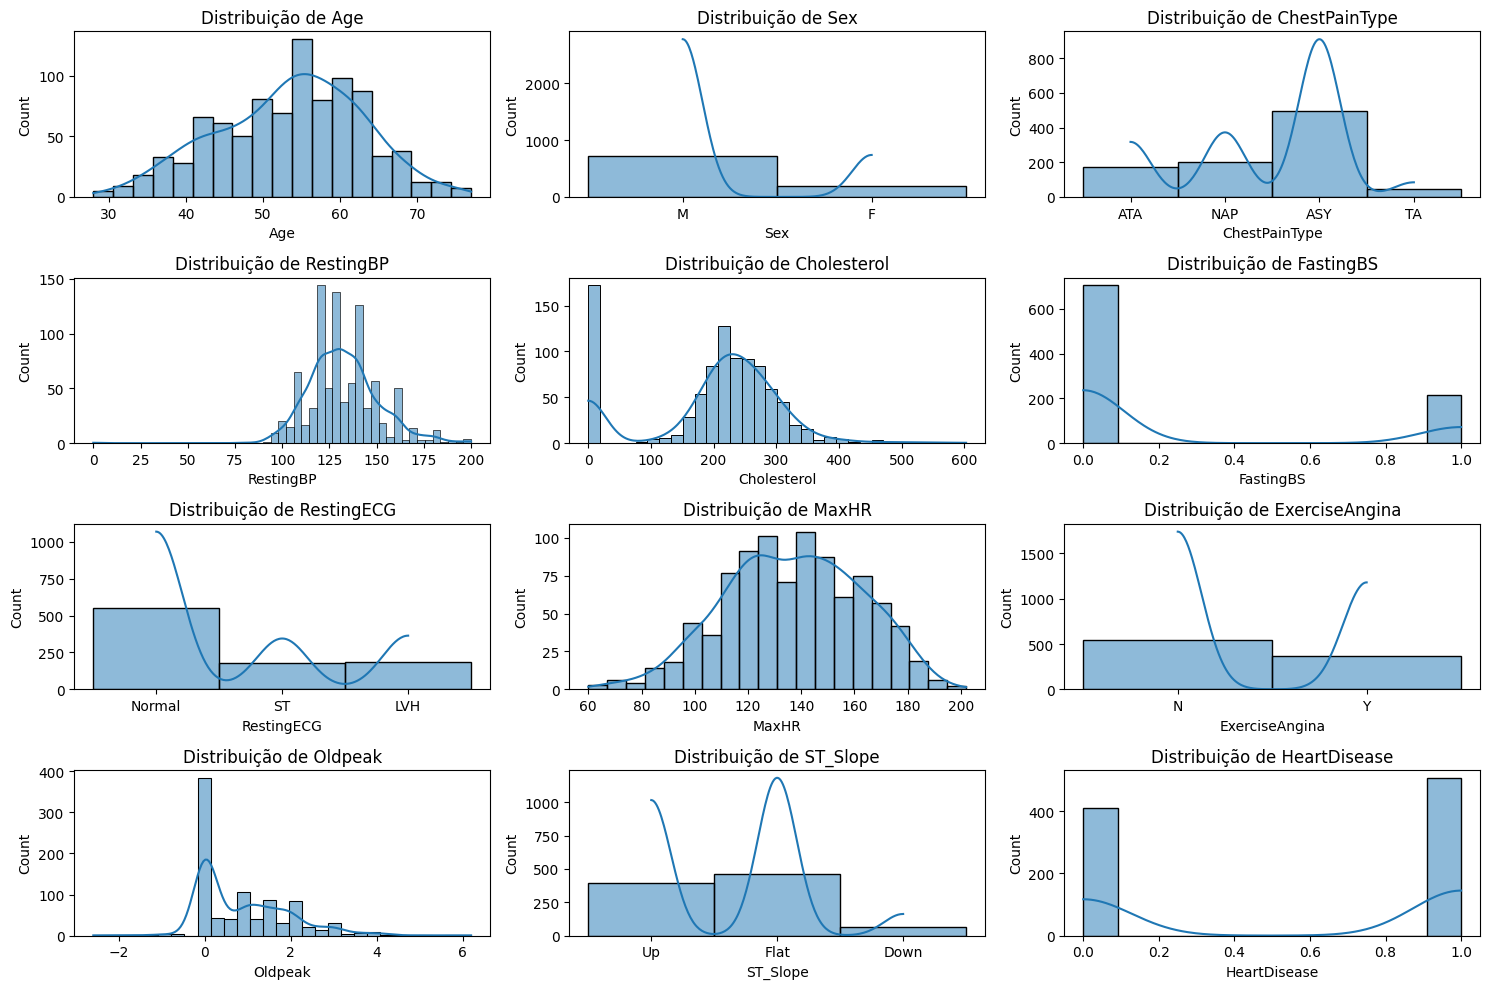

In [12]:
fig = plt.figure(figsize=(15, 10))
for i,col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribuição de {col}")
    sns.histplot(df[col], kde = True)

fig.tight_layout()
fig.show()

<Figure size 1500x1000 with 0 Axes>

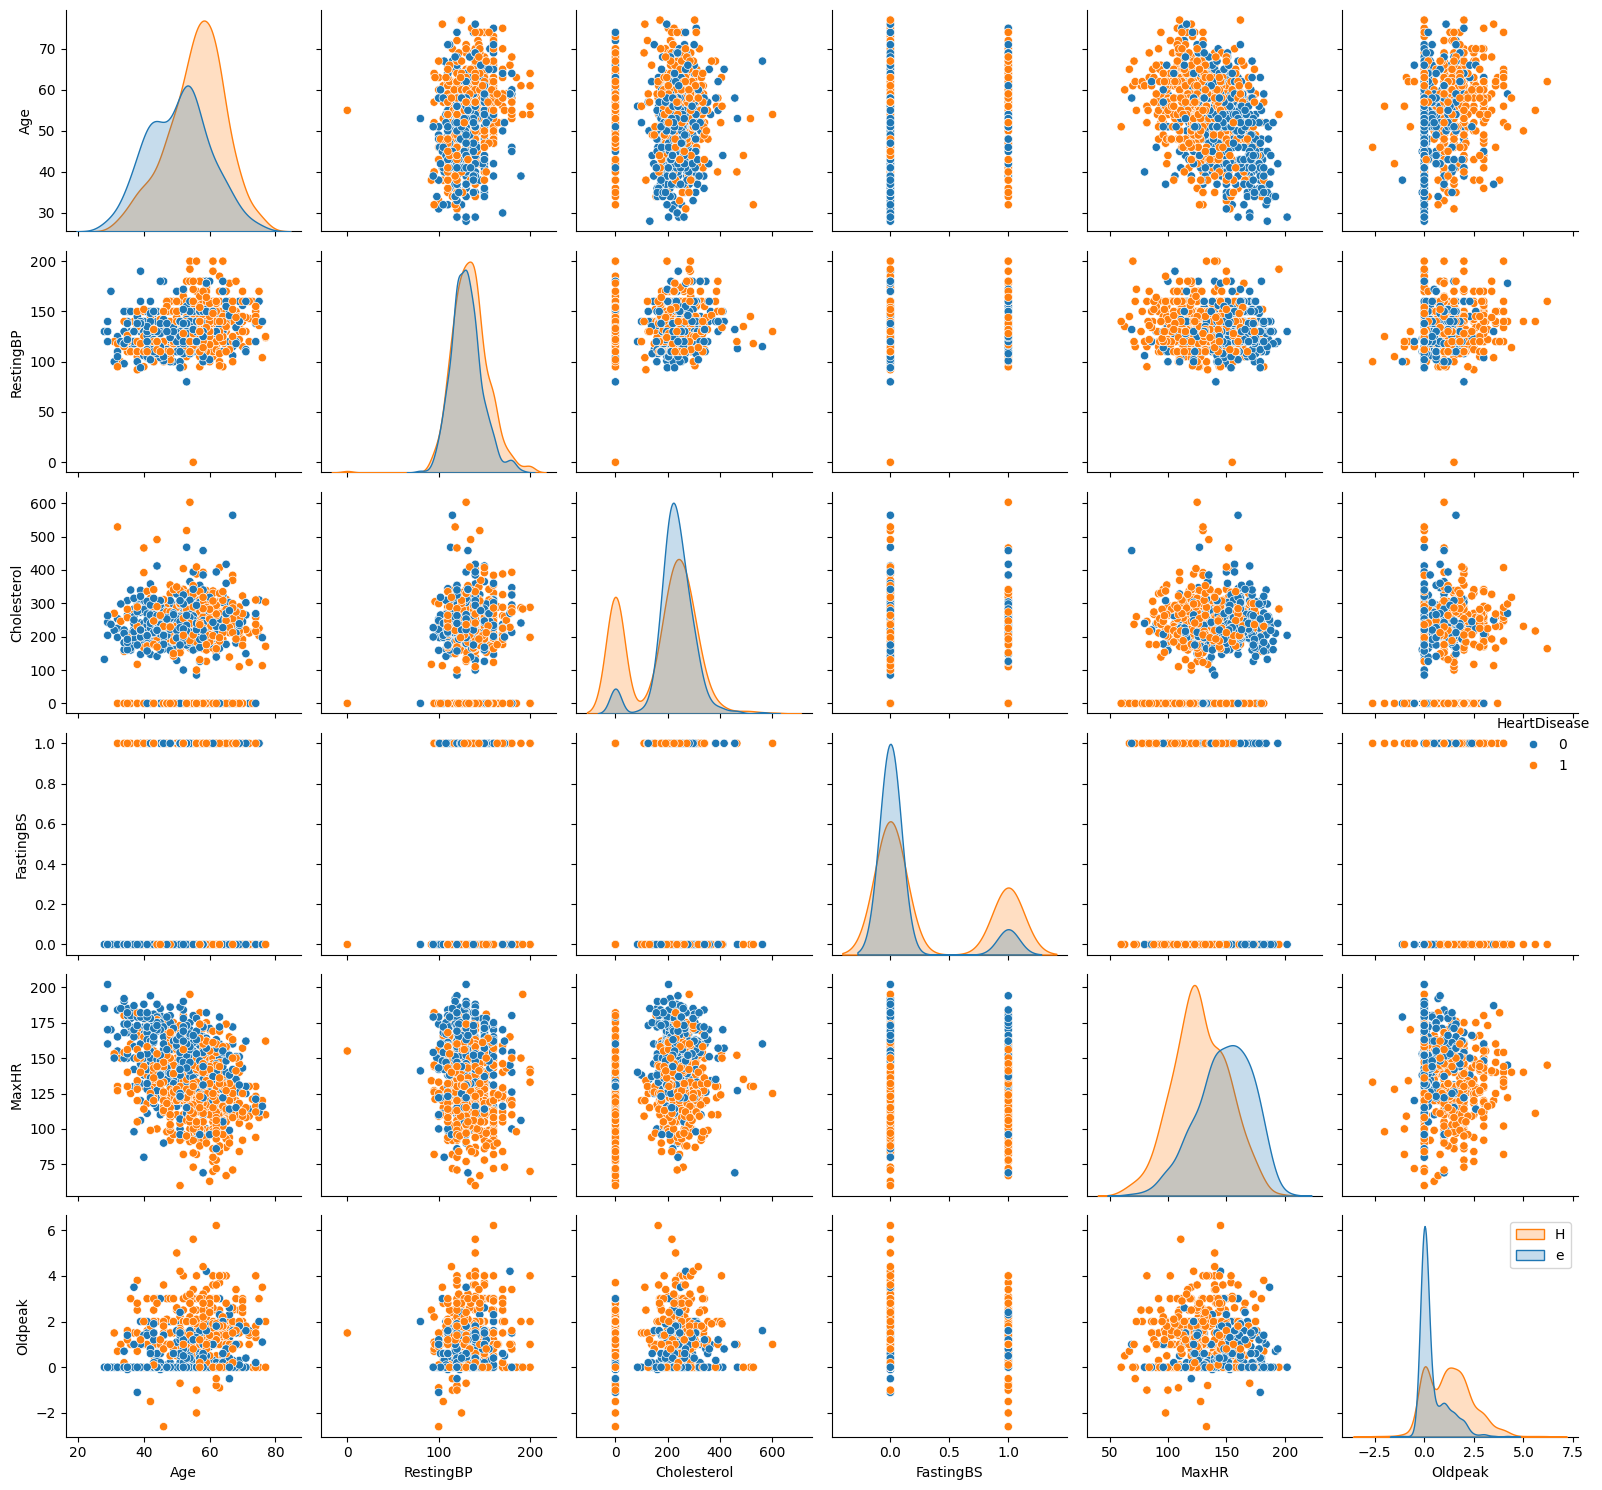

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue="HeartDisease")
plt.legend("HeartDisease")
plt.tight_layout()
plt.show()

## Checando Features Categóricas

Análise para a aplicação do one-hot encoding confirma a possibilidade, uma vez que cada uma das features tem um número baixo de categorias.

In [14]:
string_col = [col for col in df.columns if df[col].dtype in ['object']]
for col in string_col:
    print(df[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


# Preparação do Pipeline




## Separando features e target

In [15]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

## Separando Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Separando features numéricas e categóricas

In [17]:
numeric_features = [col for col in X_train.columns if X_train[col].dtypes in ['int64', 'float64']]
categorical_features = [col for col in X_train.columns if X_train[col].dtypes in ['object']]

## Pipeline genérico de pré-processamento

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, OneHotEncoder

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(missing_values = 0, strategy = "median")),
    ("scaler", RobustScaler())
])

# Categorical pipeline
catorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy = "most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown = "ignore"))
])

# ColumnTransformer
preprocessor_lr = ColumnTransformer([
    ("num", numeric_transformer,numeric_features),
    ("cat", catorical_transformer,categorical_features)
])

## Pipeline de pré-processamento para modelos baseados em árvore

In [20]:
#preprocessor for tree-based model
preprocessor_treebased = ColumnTransformer([
    ("num", SimpleImputer(missing_values = 0, strategy = "median"), numeric_features),
    ("cat", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value= -1), categorical_features)
])

# Treinamento dos Modelos de Classificação Selecionados

Os seguntes modelos foram selacionados para esse caso de uso:
* Dummy Classifier
* Logistic Regression
* K-Nearest Neighbors
* Support Vector Machine
* Decision Tree
* Random Forest
* xgboost


## Setup de cross-validation

Para cross-validation eu selecionei o StratifiedKFold com shuffle=True e n_splits=5



In [21]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

## Treinamento e avaliação de cada modelo (função genérica)

In [22]:
from sklearn.metrics import classification_report

def cross_val_report(pipe, X_train, y_train):

    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train),1):
        X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        pipe.fit(X_train_fold, y_train_fold)
        y_val_pred = pipe.predict(X_valid_fold)
        print(f"\nClassification report for fold {fold}:")
        print(classification_report(y_valid_fold, y_val_pred))
        report = classification_report(y_valid_fold, y_val_pred, output_dict=True)
        precision_scores.append(report['weighted avg']['precision'])
        recall_scores.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])

    print("\nMédia Ponderada da Acurácia: ",np.mean(precision_scores))
    print("Média Ponderada do recall: ",np.mean(recall_scores))
    print("Média Ponderada f1-score: ",np.mean(f1_scores))

## Baseline model - Dummy classifier

In [28]:
# DummyClassifier
from sklearn.dummy import DummyClassifier

pipe_dummy = Pipeline([
    ("preprocess", preprocessor_lr),
    ("classifier", DummyClassifier(strategy="stratified"))
])

pipe_dummy.fit(X_train, y_train)
y_pred = pipe_dummy.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47        82
           1       0.58      0.59      0.58       102

    accuracy                           0.53       184
   macro avg       0.53      0.53      0.53       184
weighted avg       0.53      0.53      0.53       184



## Regressão Logística

In [30]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("preprocess", preprocessor_lr),
    ("classifier", LogisticRegression(class_weight = "balanced", random_state = 42))
])

# Evaluate with cross-validation
cross_val_report(pipe_lr, X_train,y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        65
           1       0.89      0.83      0.86        82

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        66
           1       0.78      0.88      0.83        81

    accuracy                           0.80       147
   macro avg       0.80      0.79      0.79       147
weighted avg       0.80      0.80      0.79       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        66
           1       0.88      0.85      0.87        81

    accuracy                           0.86       147
   macro avg       0.86

## KNN

In [31]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ("preprocess", preprocessor_lr),
    ("classifier", KNeighborsClassifier(n_neighbors = 5))
])

# Evaluate with cross-validation
cross_val_report(pipe_knn, X_train,y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        65
           1       0.87      0.84      0.86        82

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.84      0.84      0.84       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        66
           1       0.75      0.86      0.80        81

    accuracy                           0.77       147
   macro avg       0.77      0.76      0.76       147
weighted avg       0.77      0.77      0.77       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.89      0.89      0.89        81

    accuracy                           0.88       147
   macro avg       0.88

## SVM

In [32]:
# SVM
from sklearn.svm import SVC

pipe_svc = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("classifier", SVC(kernel = 'rbf', probability = True, class_weight = "balanced"))
])

cross_val_report(pipe_svc,X_train,y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        65
           1       0.87      0.80      0.84        82

    accuracy                           0.82       147
   macro avg       0.82      0.83      0.82       147
weighted avg       0.83      0.82      0.82       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        66
           1       0.77      0.84      0.80        81

    accuracy                           0.78       147
   macro avg       0.78      0.77      0.77       147
weighted avg       0.78      0.78      0.77       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.89      0.84      0.87        81

    accuracy                           0.86       147
   macro avg       0.86

## Decision Tree

In [33]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ("preprocess", preprocessor_treebased),
    ("classifier", DecisionTreeClassifier(class_weight = "balanced", random_state = 42))
])

cross_val_report(pipe_dt,X_train, y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        65
           1       0.78      0.77      0.77        82

    accuracy                           0.75       147
   macro avg       0.74      0.75      0.75       147
weighted avg       0.75      0.75      0.75       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        66
           1       0.80      0.83      0.81        81

    accuracy                           0.79       147
   macro avg       0.79      0.78      0.79       147
weighted avg       0.79      0.79      0.79       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        66
           1       0.86      0.74      0.79        81

    accuracy                           0.79       147
   macro avg       0.79

## Random Forest

In [34]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("preprocess", preprocessor_treebased),
    ("classifier", RandomForestClassifier(class_weight = "balanced", random_state = 42))
])

cross_val_report(pipe_rf, X_train,y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        65
           1       0.84      0.87      0.85        82

    accuracy                           0.83       147
   macro avg       0.83      0.83      0.83       147
weighted avg       0.83      0.83      0.83       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        66
           1       0.76      0.89      0.82        81

    accuracy                           0.78       147
   macro avg       0.79      0.77      0.77       147
weighted avg       0.79      0.78      0.78       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        66
           1       0.88      0.85      0.87        81

    accuracy                           0.86       147
   macro avg       0.86

## Xgboost

In [35]:
# XGBClassifier
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ("preprocess", preprocessor_treebased),
    ("classifier", XGBClassifier(class_weight = "balanced", random_state = 42))
])

cross_val_report(pipe_xgb, X_train,y_train)


Classification report for fold 1:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        65
           1       0.83      0.83      0.83        82

    accuracy                           0.81       147
   macro avg       0.81      0.81      0.81       147
weighted avg       0.81      0.81      0.81       147


Classification report for fold 2:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        66
           1       0.79      0.86      0.82        81

    accuracy                           0.80       147
   macro avg       0.80      0.79      0.79       147
weighted avg       0.80      0.80      0.79       147


Classification report for fold 3:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        66
           1       0.88      0.88      0.88        81

    accuracy                           0.86       147
   macro avg       0.86

## Sumário da cross-validation

### Logistic Regression
* Média Ponderada da Acurácia:  0.8506379684281654
* Média Ponderada do recall:  0.8488025347125152
* Média Ponderada f1-score:  0.8485179752646038
### KNN
* Média Ponderada da Acurácia:  0.8499166619033106
* Média Ponderada do recall:  0.8488025347125152
* Média Ponderada f1-score:  0.8479978610725354
### SVM
* Média Ponderada da Acurácia:  0.8477712861334551
* Média Ponderada do recall:  0.8461000838691641
* Média Ponderada f1-score:  0.8458571118661771
### Decision Tree
* Média Ponderada da Acurácia:  0.7798188795514583
* Média Ponderada do recall:  0.7778958158605909
* Média Ponderada f1-score:  0.7777762179342234
### Random Forest
* Média Ponderada da Acurácia:  0.8448340764947302
* Média Ponderada do recall:  0.8433417202497436
* Média Ponderada f1-score:  0.8423640385720781
### XGBoost
* Média Ponderada da Acurácia:  0.8423808489234361
* Média Ponderada do recall:  0.8420091324200912
* Média Ponderada f1-score:  0.8416435729854286

# Analisando a Matriz de Confusão

In [36]:
models = [
    ("DummyClassifier", pipe_dummy),
    ("Logistic Regression", pipe_lr),
    ("KNN", pipe_knn),
    ("SVM", pipe_svc),
    ("Decision Tree", pipe_dt),
    ("Random Forest", pipe_rf),
    ("XGboost", pipe_xgb)
]

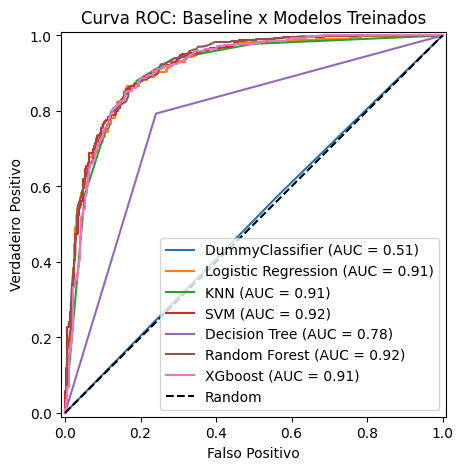

In [37]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(8, 5), facecolor="white")
ax = plt.gca()

for name, model in models:
        y_proba = cross_val_predict(model, X_train, y_train, cv=cv, method = "predict_proba")[:, 1]
        RocCurveDisplay.from_predictions(y_train, y_proba, name = name, ax = ax)

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC: Baseline x Modelos Treinados")
plt.legend(loc="lower right")
plt.grid(True, color="white", linewidth=0.7, alpha=0.7)
plt.show()

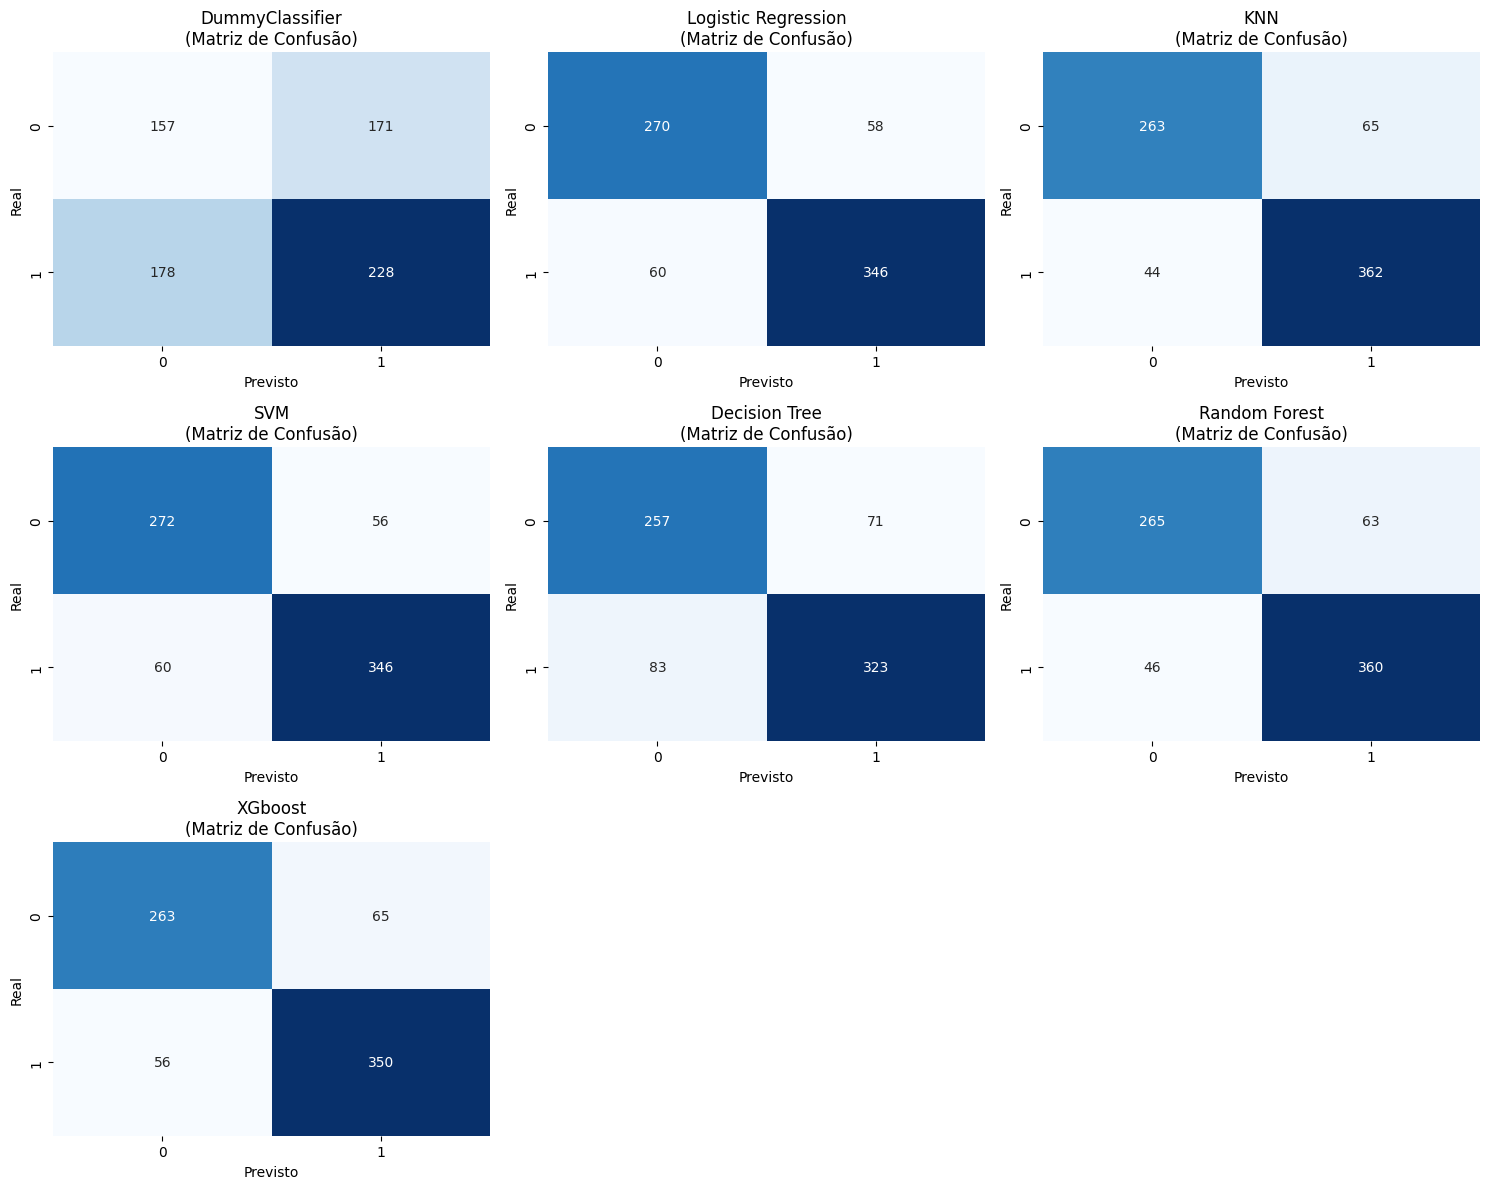

In [38]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for (name, model), ax in zip(models, axes):
    y_pred = cross_val_predict(model, X_train, y_train, cv = 5, method = "predict")
    cm = confusion_matrix(y_train, y_pred)

    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False, ax = ax)
    ax.set_title(f"{name}\n(Matriz de Confusão)")
    ax.set_xlabel("Previsto")
    ax.set_ylabel("Real")

# delete subplot not ues
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Tunning de Hyperparametros dos modelos selecionados

Baseado nas análises da curva ROC e da Matriz de Confusão, os seguntes modelos foram selecionados para tunning utilizando o GridSearchCV:

* SVM
* Random Forest
* KNN



## SVM

In [58]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    "precision": make_scorer(precision_score, average = "weighted", zero_division = 0),
    "recall": make_scorer(recall_score, average = "weighted", zero_division = 0),
    "f1": make_scorer(f1_score, average = "weighted", zero_division = 0)
}

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale", "auto", 0.01, 0.1, 1]
}

grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=cv, scoring=scoring, refit="f1", n_jobs=-1)

In [60]:
grid_svc.fit(X_train, y_train)
print("SVM Best params:", grid_svc.best_params_)
print("SVM mean precision (CV):", grid_svc.cv_results_['mean_test_precision'][grid_svc.best_index_])
print("SVM mean recall (CV):", grid_svc.cv_results_['mean_test_recall'][grid_svc.best_index_])
print("SVM mean f1 (CV):", grid_svc.cv_results_['mean_test_f1'][grid_svc.best_index_])

SVM Best params: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
SVM mean precision (CV): 0.8515855304439176
SVM mean recall (CV): 0.8501910353182369
SVM mean f1 (CV): 0.8498884516486893


## Random Forest

In [61]:
param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring=scoring, refit="f1", n_jobs=-1)

In [62]:
grid_rf.fit(X_train, y_train)

print("\nRF Best params:", grid_rf.best_params_)
print("RF mean precision (CV):", grid_rf.cv_results_['mean_test_precision'][grid_rf.best_index_])
print("RF mean recall (CV):", grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_])
print("RF mean f1 (CV):", grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_])


RF Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
RF mean precision (CV): 0.8529578882753969
RF mean recall (CV): 0.8514211163917622
RF mean f1 (CV): 0.8506130998428227


## KNN

In [63]:
param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["euclidean", "manhattan", "minkowski"]
}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring=scoring, refit="f1", n_jobs=-1)

In [64]:
grid_knn.fit(X_train, y_train)

print("\nKNN Best params:", grid_knn.best_params_)
print("KNN mean precision (CV):", grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_])
print("KNN mean recall (CV):", grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_])
print("KNN mean f1 (CV):", grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_])


KNN Best params: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
KNN mean precision (CV): 0.856664848957198
KNN mean recall (CV): 0.8555493430248813
KNN mean f1 (CV): 0.8548271444495976


## Avaliação após o tunning dos hyperparametros

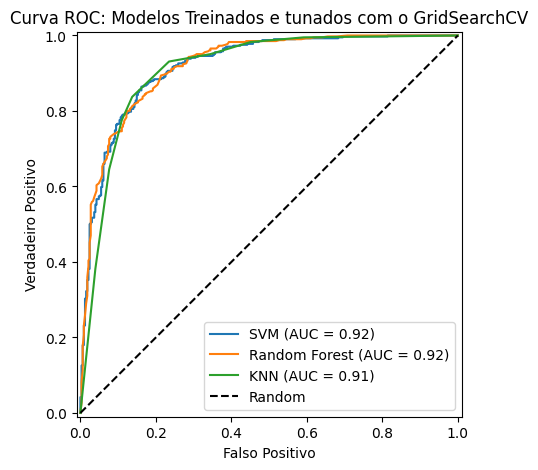

In [65]:
models_results = [
    ("SVM", grid_svc.best_estimator_),
    ("Random Forest", grid_rf.best_estimator_),
    ("KNN", grid_knn.best_estimator_)
]

plt.figure(figsize=(8, 5), facecolor="white")
ax = plt.gca()

for name, model in models_results:
        y_proba = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")[:, 1]
        RocCurveDisplay.from_predictions(y_train, y_proba, name=name, ax=ax)

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC: Modelos Treinados e tunados com o GridSearchCV")
plt.legend(loc="lower right")
plt.grid(True, color="white", linewidth=0.7, alpha=0.7)
plt.show()

## Matriz de Confusão após tunning dos hyperparametros

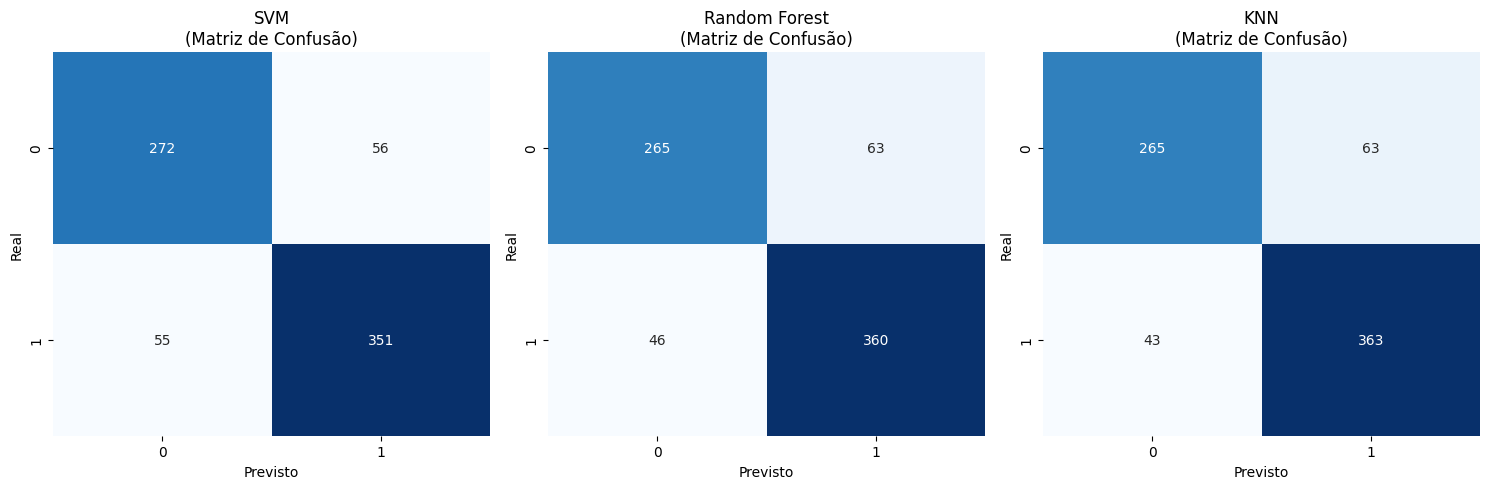

In [66]:
models = [
    ("SVM", grid_svc.best_estimator_),
    ("Random Forest", grid_rf.best_estimator_),
    ("KNN", grid_knn.best_estimator_)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()

for (name, model), ax in zip(models, axes):
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{name}\n(Matriz de Confusão)")
    ax.set_xlabel("Previsto")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

# Seleção do melhor modelo baseado nos resultados - KNN após tunning

O KNN apresentou os melhores resultados no que diz respeito aos falsos negativos, o que é muito importante no nosso contexto, com outras métrica muito aproximadas dos outros 2 modelos, portanto foi selecionado como o modelo mais adequado para o nosso caso de uso.

## Avaliação Final do Modelo Selecionado

In [73]:
selected_knn = grid_knn.best_estimator_

# treinamento
selected_knn.fit(X_train, y_train)

# predict
y_test_pred = selected_knn.predict(X_test)

metrics = ["Acurácia", "Recall", "F1-score"]
scores = [
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred)
]

df_bar = pd.DataFrame({
    "Metric" : metrics,
    "Score" : scores
})

fig_bar = px.bar(
    df_bar,
    x = "Metric",
    y = "Score",
    text = "Score",
    color = "Metric",
    title = "KNN Tunado (Test Set)"
)

fig_bar.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_bar.update_layout(yaxis=dict(range=[0,1]), showlegend=False)
fig_bar.show()

## Matriz de Confusão do Modelo Selecionado

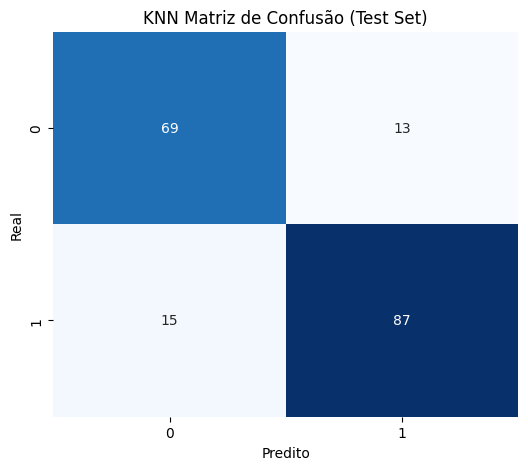

In [74]:
# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("KNN Matriz de Confusão (Test Set)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

## Curva ROC do Modelo

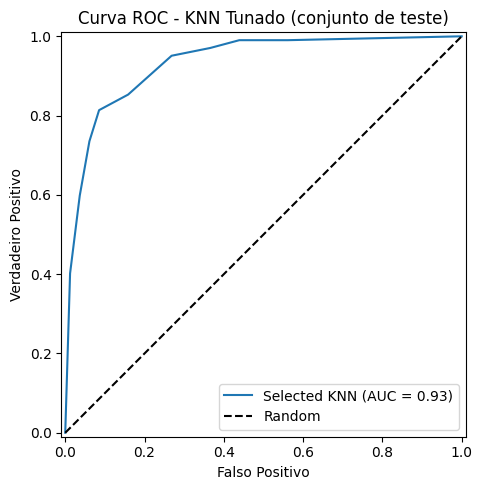

In [75]:
plt.figure(figsize=(8, 5), facecolor="white")
ax = plt.gca()

y_proba = selected_knn.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_proba, name="Selected KNN", ax=ax)

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - KNN Tunado (conjunto de teste)")
plt.legend(loc="lower right")
plt.grid(True, color = "white", linewidth = 0.7, alpha = 0.7)

plt.tight_layout()
plt.show()

## Teste de Overfitting e Generalização do Modelo Selecionado

In [76]:
# --- Training metrics ---
y_train_pred = selected_knn.predict(X_train)
train_precision = precision_score(y_train, y_train_pred, average='binary')
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

# --- Test metrics ---
y_test_pred = selected_knn.predict(X_test)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# --- Print raw metrics ---
print("Training metrics: Precision={:.3f}, Recall={:.3f}, F1={:.3f}".format(train_precision, train_recall, train_f1))
print("Test metrics:     Precision={:.3f}, Recall={:.3f}, F1={:.3f}".format(test_precision, test_recall, test_f1))

# --- Check overfitting/generalization ---
threshold = 0.05
metrics = ['Precision', 'Recall', 'F1-score']
train_scores = [train_precision, train_recall, train_f1]
test_scores = [test_precision, test_recall, test_f1]

for metric, tr, te in zip(metrics, train_scores, test_scores):
    gap = tr - te
    if gap > threshold:
        status = "Overfitting detected"
    elif gap < -threshold:
        status = "Underfitting detected"
    else:
        status = "Generalizes well"
    print(f"{metric}: Train={tr:.3f}, Test={te:.3f} --> {status}")

Training metrics: Precision=0.877, Recall=0.914, F1=0.895
Test metrics:     Precision=0.870, Recall=0.853, F1=0.861
Precision: Train=0.877, Test=0.870 --> Generalizes well
Recall: Train=0.914, Test=0.853 --> Overfitting detected
F1-score: Train=0.895, Test=0.861 --> Generalizes well


## Curva de Aprendizado do Modelo Selecionado

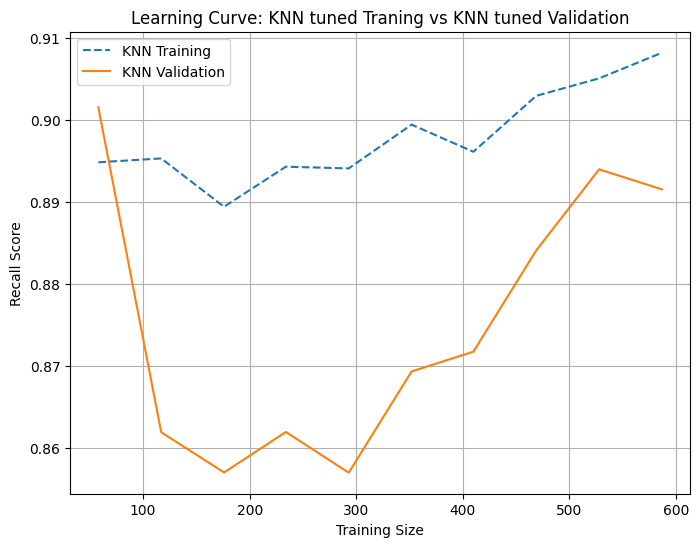

In [ ]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(8,6))

train_sizes, train_scores, test_scores = learning_curve(
    estimator=selected_knn,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='recall',  # optimize recall
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', label=f'{name} Training')
plt.plot(train_sizes, test_mean, '-', label=f'{name} Validation')

plt.xlabel('Training Size')
plt.ylabel('Recall Score')
plt.title('Learning Curve: KNN tuned Traning vs KNN tuned Validation')
plt.legend()
plt.grid(True)
plt.show()

## Salvando, carregando e testando o Modelo

In [ ]:
from joblib import dump, load
dump(selected_knn, "knn_heart_disease.joblib")

# 2. Load the saved model
model = load("knn_heart_disease.joblib")

# 3. Test the loaded model with sample data
X_test_sample = df.drop("HeartDisease", axis=1).head()
y_true_sample = df["HeartDisease"].head()
y_pred_sample = model.predict(X_test_sample)

print("True labels:     ", list(y_true_sample.values))
print("Predicted labels:", list(y_pred_sample))

True labels:      [np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0)]
Predicted labels: [np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0)]
